In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excl_files = 'D:\\Mobility\\excl_file_names.csv'

# Load excel file names and sheet names as dataFrame: excl_files_sheets
files_sheets = pd.read_csv(excl_files)
print(type(files_sheets))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(files_sheets.iloc[0,:])

file_name    BKxls R3969 Lazarijstraat.xls
 sheet_1        Gegevens(1) tp R3969 kan 1
 sheet_2        Gegevens(2) tp R3969 kan 2
Name: 0, dtype: object


In [4]:
num_of_datasets = files_sheets.shape[0]
print(num_of_datasets)

3


In [5]:
col_header_filename = 'D:\\Mobility\\col_headers.txt'

col_headers = []
with open(col_header_filename) as file:
    for line in file:
        col_headers.append(line.rstrip('\n'))

    
print(col_headers)

['Datum', 'Tijd', 'Klassen', '< 2,0 | < 30', '< 2,0 | 30 - 50', '< 2,0 | 50 - 70', '< 2,0 | > 70', '2,0 - 3,9 | < 30', '2,0 - 3,9 | 30 - 50', '2,0 - 3,9 | 50 - 70', '2,0 - 3,9 | > 70', '3,9 - 7,0 | < 30', '3,9 - 7,0 | 30 - 50', '3,9 - 7,0 | 50 - 70', '3,9 - 7,0 | > 70', '> 7,0 | < 30', '> 7,0 | 30 - 50', '> 7,0 | 50 - 70', '> 7,0 | > 70', 'Totaal Abs.', 'Totaal Rel.', 'Fout']


In [10]:
df = pd.DataFrame(columns=col_headers + ['Start', 'End'])
print(df)

Empty DataFrame
Columns: [Datum, Tijd, Klassen, < 2,0 | < 30, < 2,0 | 30 - 50, < 2,0 | 50 - 70, < 2,0 | > 70, 2,0 - 3,9 | < 30, 2,0 - 3,9 | 30 - 50, 2,0 - 3,9 | 50 - 70, 2,0 - 3,9 | > 70, 3,9 - 7,0 | < 30, 3,9 - 7,0 | 30 - 50, 3,9 - 7,0 | 50 - 70, 3,9 - 7,0 | > 70, > 7,0 | < 30, > 7,0 | 30 - 50, > 7,0 | 50 - 70, > 7,0 | > 70, Totaal Abs., Totaal Rel., Fout, Start, End]
Index: []

[0 rows x 24 columns]


In [11]:
skiprows_road_entry = 17
skiprows_vcounts =23

data_folder_path = 'D:\\Mobility\\Nulmeting\\Slangtellingen-excelbestanden\\'

for line in files_sheets.iterrows():
    # print(line)
    excl_file_name = line[1][0].strip()
    sheet_names = []
    sheet_names.append(line[1][1].strip())
    sheet_names.append(line[1][2].strip()) 
    print(excl_file_name)
    print(sheet_names)
    print('\n')

    xlsx = pd.ExcelFile(data_folder_path + excl_file_name)
    for sheet_name in sheet_names:
        df_temp = xlsx.parse(sheet_name=sheet_name, skiprows=skiprows_road_entry) 
        road_entry = df_temp.iloc[0, 2]
        
        print(road_entry)
        (start_road, end_road) = road_entry.split(' - ')
        start_road = start_road.strip()
        end_road = end_road[:-3].strip()
        print(start_road)
        print(end_road)
    
        df_temp = df_temp[(skiprows_vcounts -skiprows_road_entry):]
            
        df_temp.columns = col_headers
        print(df_temp.columns)
        df_temp['Start'] = [start_road for i in range(df_temp.shape[0])]
        df_temp['End'] = [end_road for i in range(df_temp.shape[0])]
        df_temp.fillna(method = 'ffill', inplace = True)
        print(df_temp.head())
        
        df = df.append(df_temp, ignore_index = True)
    
    # print(df_01.shape)
    # print(df_02.shape)    

    print('\n')
    print('\n')
    print('\n')
    
print(df.shape)    

BKxls R3969 Lazarijstraat.xls
['Gegevens(1) tp R3969 kan 1', 'Gegevens(2) tp R3969 kan 2']


Armand Hertzstraat - Lazarijstraat (1)
Armand Hertzstraat
Lazarijstraat
Index(['Datum', 'Tijd', 'Klassen', '< 2,0 | < 30', '< 2,0 | 30 - 50',
       '< 2,0 | 50 - 70', '< 2,0 | > 70', '2,0 - 3,9 | < 30',
       '2,0 - 3,9 | 30 - 50', '2,0 - 3,9 | 50 - 70', '2,0 - 3,9 | > 70',
       '3,9 - 7,0 | < 30', '3,9 - 7,0 | 30 - 50', '3,9 - 7,0 | 50 - 70',
       '3,9 - 7,0 | > 70', '> 7,0 | < 30', '> 7,0 | 30 - 50',
       '> 7,0 | 50 - 70', '> 7,0 | > 70', 'Totaal Abs.', 'Totaal Rel.',
       'Fout'],
      dtype='object')
       Datum   Tijd  Klassen  < 2,0 | < 30  < 2,0 | 30 - 50  < 2,0 | 50 - 70  \
6   4-9-2019  00:00      NaN           NaN              NaN              NaN   
7   4-9-2019  00:15      NaN           NaN              NaN              NaN   
8   4-9-2019  00:30      NaN           NaN              NaN              NaN   
9   4-9-2019  00:45      NaN           NaN              NaN      

Lazarijstraat - Plantenstraat (1)
Lazarijstraat
Plantenstraat
Index(['Datum', 'Tijd', 'Klassen', '< 2,0 | < 30', '< 2,0 | 30 - 50',
       '< 2,0 | 50 - 70', '< 2,0 | > 70', '2,0 - 3,9 | < 30',
       '2,0 - 3,9 | 30 - 50', '2,0 - 3,9 | 50 - 70', '2,0 - 3,9 | > 70',
       '3,9 - 7,0 | < 30', '3,9 - 7,0 | 30 - 50', '3,9 - 7,0 | 50 - 70',
       '3,9 - 7,0 | > 70', '> 7,0 | < 30', '> 7,0 | 30 - 50',
       '> 7,0 | 50 - 70', '> 7,0 | > 70', 'Totaal Abs.', 'Totaal Rel.',
       'Fout'],
      dtype='object')
       Datum   Tijd  Klassen  < 2,0 | < 30  < 2,0 | 30 - 50  < 2,0 | 50 - 70  \
6   4-9-2019  00:00      NaN           NaN              NaN              NaN   
7   4-9-2019  00:15      NaN           NaN              NaN              NaN   
8   4-9-2019  00:30      NaN           NaN              NaN              NaN   
9   4-9-2019  00:45      NaN           NaN              NaN              NaN   
10  4-9-2019  01:00      NaN           NaN              NaN              NaN   

    < 2

In [12]:
print(df.head())

      Datum   Tijd  Klassen  < 2,0 | < 30  < 2,0 | 30 - 50  < 2,0 | 50 - 70  \
0  4-9-2019  00:00      NaN           NaN              NaN              NaN   
1  4-9-2019  00:15      NaN           NaN              NaN              NaN   
2  4-9-2019  00:30      NaN           NaN              NaN              NaN   
3  4-9-2019  00:45      NaN           NaN              NaN              NaN   
4  4-9-2019  01:00      NaN           NaN              NaN              NaN   

   < 2,0 | > 70  2,0 - 3,9 | < 30  2,0 - 3,9 | 30 - 50  2,0 - 3,9 | 50 - 70  \
0           NaN               NaN                  NaN                  NaN   
1           NaN               NaN                  NaN                  NaN   
2           NaN               NaN                  NaN                  NaN   
3           NaN               NaN                  NaN                  NaN   
4           NaN               NaN                  NaN                  NaN   

   ...  3,9 - 7,0 | > 70  > 7,0 | < 30  > 7,0 | 30

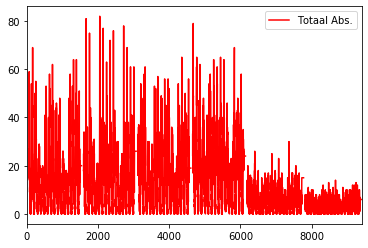

In [13]:
ax = plt.gca()

df.plot(kind='line', y='Totaal Abs.', color='red', ax=ax)

plt.show()